# Análisis preeliminar del dataframe 
*Nota: Ha sido adaptado de Meqlad (2024) en https://www.kaggle.com/code/mohamedmeqlad/customer-segmentation-eda-feat-eng-kmeans*
Se ejecuta este análisis con el fin de validar que la información incluida está lo más integra posible.

In [1]:
# librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

In [2]:
# lectura del archivo
df = pd.read_csv("customer_segmentation.csv") 

In [3]:
df.shape

(2240, 29)

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Debido a que hay 24 datos vacíos en Income, se colocará el promedio de ingresos en vez de eliminar las filas completas

In [7]:
df['Income'].fillna(df['Income'].median(), inplace = True)

In [8]:
# cambio a tipo datetime en fecha
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format="%d-%m-%Y")

# conocer la fecha del ultimo enrollment en la base de datos 
dates = []
for i in df['Dt_Customer']:
    i = i.date()
    dates.append(i)
# Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:", max(dates))
print("The oldest customer's enrolment date in the records:", min(dates))

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


### Agregando información 
Se estandarizará la información dentro del set de datos y se agregarán datos que sinteticen mejor la información

In [9]:
# edad del cliente hasta la ultima fecha de suscripcion
df['Age_on_2014'] = 2014 - df['Year_Birth']

# cantidad de productos consumidos desde que inicio su suscripcion
df['Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df[
    'MntSweetProducts'] + df['MntGoldProds']

In [10]:
# unificar categorias
# categoria de estado civil
df['Marital_Status'] = df['Marital_Status'].replace(
    {"Married": "Partner", "Together": "Partner", "Absurd": "Alone", "Widow": "Alone", "YOLO": "Alone",
     "Divorced": "Alone", "Single": "Alone"})
# ninios en casa
df['Children'] = df['Kidhome'] + df['Teenhome']

#  cantidad de miembros por familia
df['Family_size'] = df['Marital_Status'].replace({"Alone": 1, "Partner": 2}) + df['Children']

# es padre de familia
df['Is_parent'] = np.where(df.Children > 0, True, False)

In [11]:
# simplificar la escolaridad en tres grupos
df['Education'] = df['Education'].replace(
    {"Basic": "Undergraduate", "2n Cycle": "Undergraduate", "Graduation": "Graduate", "Master": "Postgraduate",
     "PhD": "Postgraduate"})

# cambiar nombres de columnas
df = df.rename(
    columns={"MntWines": "Wines", "MntFruits": "Fruits", "MntMeatProducts": "Meat", "MntFishProducts": "Fish",
             "MntSweetProducts": "Sweets", "MntGoldProds": "Gold"})

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   Wines                2240 non-null   int64         
 10  Fruits               2240 non-null   int64         
 11  Meat                 2240 non-null   int64         
 12  Fish                 2240 non-null   int64         
 13  Sweets               2240 non-nul

Las variables categoricas deben de ser reconocidas como tal, aquí se incluye education,marital_status, acceptedcpm,complain, response,is_parent.

In [12]:
le = LabelEncoder()
df['AcceptedCmp3'] = le.fit_transform(df['AcceptedCmp3'])
df['AcceptedCmp4'] = le.fit_transform(df['AcceptedCmp4'])
df['AcceptedCmp5'] = le.fit_transform(df['AcceptedCmp5'])
df['AcceptedCmp2'] = le.fit_transform(df['AcceptedCmp2'])
df['AcceptedCmp1'] = le.fit_transform(df['AcceptedCmp1'])
df['Complain'] = le.fit_transform(df['Complain'])
df['Response'] = le.fit_transform(df['Response'])
df['Education'] = le.fit_transform(df['Education'])
df['Marital_Status'] = le.fit_transform(df['Marital_Status'])
df['Is_parent'] = le.fit_transform(df['Is_parent'])

Las variables que no aportan más información o pueden ser un poco redundantes se desecharán

In [13]:
df = df.drop(columns=['Dt_Customer', 'ID', 'Z_CostContact', 'Z_Revenue','Year_Birth'], axis=1)

In [14]:
# distribucion de los datos 
df.describe()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age_on_2014,Spent,Children,Family_size,Is_parent
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,0.611607,0.644643,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,0.072768,0.064286,0.013393,0.009375,0.149107,45.194196,605.798214,0.950446,2.595089,0.715179
std,0.683533,0.478728,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,0.259813,0.245316,0.114976,0.096391,0.356274,11.984069,602.249288,0.751803,0.906959,0.451430
min,0.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,5.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,68.750000,0.000000,2.000000,0.000000
50%,0.000000,1.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,396.000000,1.000000,3.000000,1.000000
75%,1.000000,1.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,1045.500000,1.000000,3.000000,1.000000
max,2.000000,1.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,121.000000,2525.000000,3.000000,5.000000,1.000000


Se presentan outliers en Income y Age_on_2014, se quitarán estos outliers.

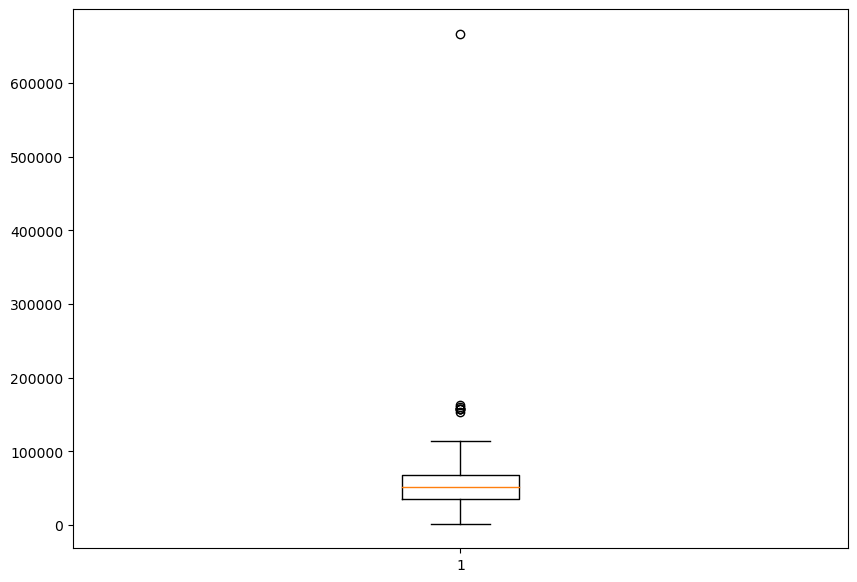

In [15]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(df["Income"])
# show plot
plt.show()

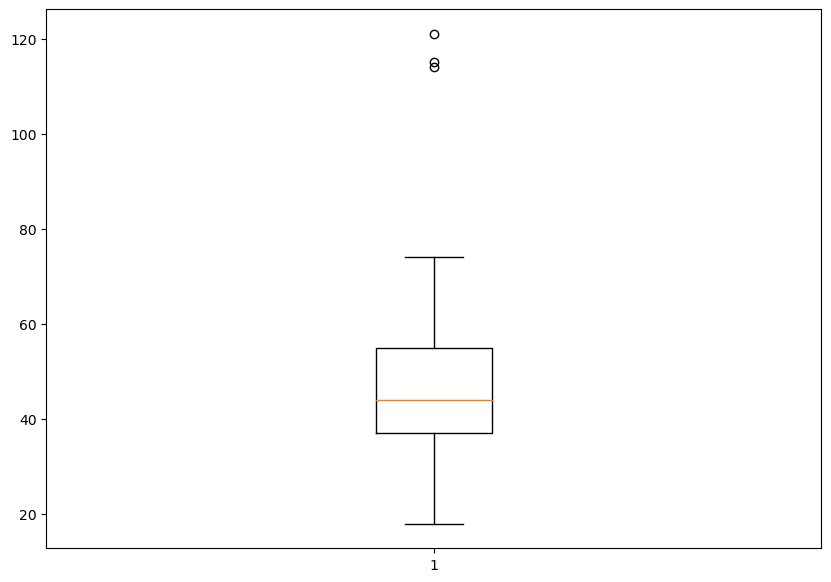

In [16]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(df["Age_on_2014"])
# show plot
plt.show()

In [17]:
df = df[(df["Age_on_2014"]<90)]
df = df[(df["Income"]<200000)]
print("The total number of data-points after removing the outliers are:", len(df))

The total number of data-points after removing the outliers are: 2236


La data presentada se exportará para ser utilizada por los algoritmos seleccionados. 

In [18]:
df.to_csv('transformed_data.csv', index=False)

### Cantidad de clusters óptimos para KMeans

In [19]:
# escalar los datos, tendra varianza 1 y media 0
# se hace en una copia del dataset
df1 = df.copy()
scaler = StandardScaler()
# escala todas las variables
scaler.fit(df1).transform(df1.astype(float)) 
scaled_df1 = pd.DataFrame(scaler.transform(df1), columns=df1.columns)

In [20]:
scaled_df1

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age_on_2014,Spent,Children,Family_size,Is_parent
0,-0.89438,-1.347635,0.288947,-0.824939,-0.930615,0.306856,0.983228,1.554170,1.679746,2.461068,...,-0.279482,-0.262362,-0.116616,-0.095001,2.386338,1.016868,1.680176,-1.264308,-1.758810,-1.584362
1,-0.89438,-1.347635,-0.262003,1.032627,0.905974,-0.383971,-0.871064,-0.636431,-0.713455,-0.650414,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,1.273264,-0.962202,1.395139,0.445618,0.631169
2,-0.89438,0.742041,0.918423,-0.824939,-0.930615,-0.798467,0.362159,0.572177,-0.177201,1.344595,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,0.333146,0.282541,-1.264308,-0.656596,-1.584362
3,-0.89438,0.742041,-1.182183,1.032627,-0.930615,-0.798467,-0.871064,-0.560893,-0.651409,-0.503991,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,-1.290693,-0.918994,0.065416,0.445618,0.631169
4,0.57070,0.742041,0.296187,1.032627,-0.930615,1.550344,-0.389661,0.421101,-0.217088,0.154911,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,-1.034298,-0.305762,0.065416,0.445618,0.631169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,-0.89438,0.742041,0.433060,-0.824939,0.905974,-0.107640,1.203128,0.421101,0.066551,0.081700,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,0.162216,1.221499,0.065416,0.445618,0.631169
2232,0.57070,0.742041,0.563440,2.890194,0.905974,0.237773,0.302727,-0.661610,-0.607091,-0.687019,...,-0.279482,3.811532,-0.116616,-0.095001,-0.419052,1.956986,-0.269201,2.724862,2.650045,0.631169
2233,-0.89438,-1.347635,0.234898,-0.824939,-0.930615,1.446720,1.794481,0.546997,0.221666,-0.101329,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,-1.034298,1.055312,-1.264308,-1.758810,-1.584362
2234,0.57070,0.742041,0.807803,-0.824939,0.905974,-1.420212,0.368102,0.093769,0.208371,0.777208,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,1.102333,0.393886,0.065416,0.445618,0.631169


In [21]:
# cantidad de clusters
wcss = [] # within cluster sum of squares: que tan similares son los individuos clasificados

# se hara de 1 a 8 clusters
for i in range(1,8): 
    kmeans = KMeans(n_clusters=i, max_iter=300) # se iterara el punto 300 veces
    kmeans.fit(scaled_df1) # se aplica kmeans a los datos 
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WSCC')

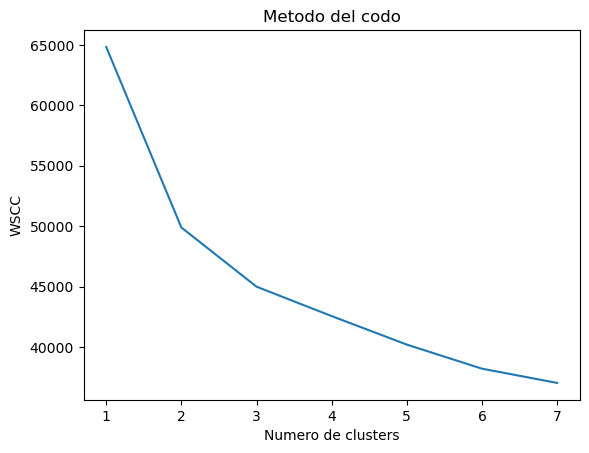

In [22]:
plt.plot(range(1,8), wcss)
plt.title("Metodo del codo")
plt.xlabel("Numero de clusters")
plt.ylabel("WSCC")

El numero optimo de clusters es 2 o 3. Se realizara con esta cantidad el algoritmo.

### Cantidad óptima de vecinos para KNN

*Nota: Adaptado de *

In [27]:
from sklearn.model_selection import train_test_split
df2 = df.copy()

# Separando los datos
# La variable X no incluye la columna Response
columns_to_exclude = ['Response']
columns_to_select = [col for col in df2.columns if col not in columns_to_exclude]

X = df2[columns_to_select]
y = df2["Response"]

# escalar la data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=0)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
from sklearn.metrics import accuracy_score
y_pred = knn.predict(x_test)
accuracy_score(y_test, y_pred)

0.8883928571428571

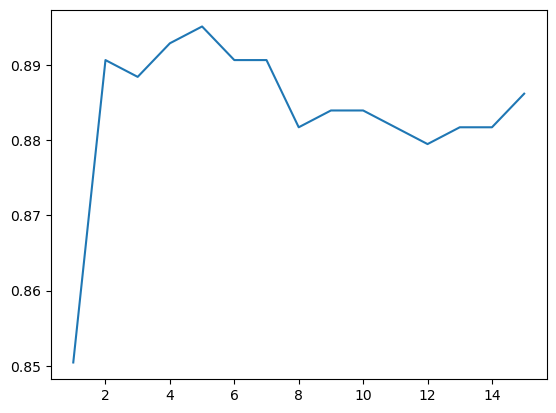

In [31]:
scores = []
for i in range(1,16):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))

import matplotlib.pyplot as plt
plt.plot(range(1,16),scores)

Con 4 y 5 vecinos parece tenerse los mejores resultados, 2 podría hacerse un overfitting de la data

In [32]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
accuracy_score(y_test, y_pred)

0.8928571428571429

In [33]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
accuracy_score(y_test, y_pred)

0.8950892857142857

Por simplicidad, se eligirá con k=5.